In [82]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
df=pd.read_csv("dulieuxettuyendaihoc.csv", header=0,delimiter=',',encoding='utf-8')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MSSV                 100 non-null    object 
 1   T1                   100 non-null    float64
 2   T2                   100 non-null    float64
 3   T3                   100 non-null    float64
 4   T4                   100 non-null    float64
 5   T5                   100 non-null    float64
 6   T6                   100 non-null    float64
 7   GT                   100 non-null    object 
 8   DT                   3 non-null      float64
 9   KV                   100 non-null    object 
 10  NGONNGU              100 non-null    float64
 11  TOANLOGICPHANTICH    100 non-null    float64
 12  GIAIQUYETVANDE       100 non-null    float64
 13  KT                   100 non-null    object 
 14  NGAYTHI              100 non-null    object 
 15  DINHHUONGNGHENGHIEP  100 non-null    obje

In [6]:
df.head(5)

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No


In [7]:
df=df[['T5','T6','GT','DT','KV','KT','NGONNGU','TOANLOGICPHANTICH','GIAIQUYETVANDE','NGAYTHI','DINHHUONGNGHENGHIEP']]
df

,T5,T6,GT,DT,KV,KT,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,NGAYTHI,DINHHUONGNGHENGHIEP
0,7.4,6.9,F,NaN,2NT,A1,3.25,3.25,4.50,12/7/2018,No
1,3.0,4.0,M,NaN,1,C,6.00,4.00,3.50,12/7/2018,Yes
2,4.8,5.7,M,NaN,1,C,5.00,6.75,4.00,12/7/2018,No
3,6.1,7.4,M,NaN,1,D1,4.25,4.25,5.25,12/7/2018,No
4,6.8,8.0,M,NaN,2NT,A,4.25,4.50,5.00,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...,...
95,7.9,6.6,F,NaN,1,C,5.25,1.50,6.25,7/20/2022,Yes
96,5.5,5.7,F,NaN,1,C,5.25,3.75,4.75,7/20/2022,No
97,9.0,8.5,M,NaN,2NT,C,7.00,8.00,4.00,7/20/2022,Yes
98,4.1,4.3,M,NaN,1,C,5.00,3.50,5.50,7/20/2022,No


In [8]:
#Xoác bỏ các dòng dữ liệu rỗng
df.dropna(how='all',inplace=True)

In [9]:
#Xóa bỏ các dòng bị trùng
df.drop_duplicates(inplace=True)

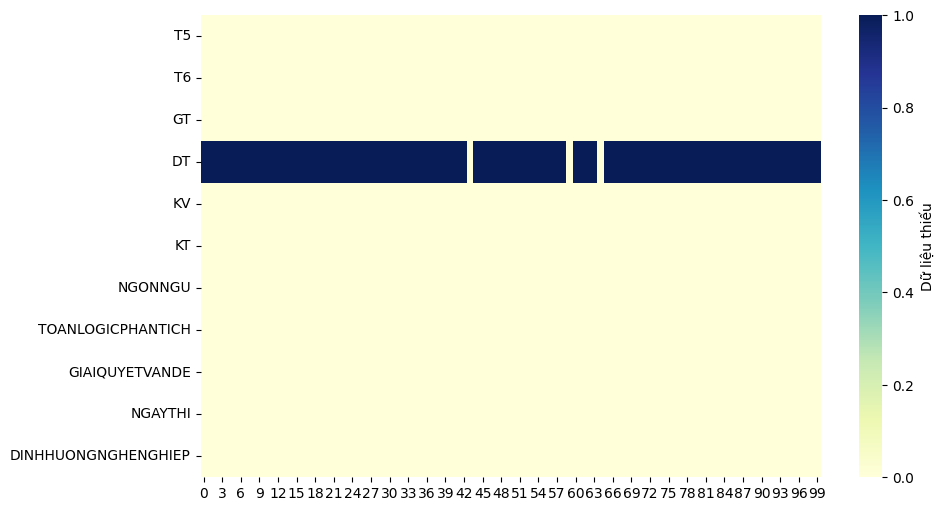

In [10]:
#Dùng heatmap để trực quan hóa dữ liệu thiếu
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap='YlGnBu',cbar_kws={'label':'Dữ liệu thiếu'})
plt.savefig('missingdata.png',dpi=100)
plt.show()

In [11]:
#Điền giá trị thiếu
df['DT'].fillna('KINH', inplace = True)
#Lưu ý: Với biến định tính ta có thể thay
# bằng giá trị yếu vị (mode)
# df['DT'].fillna(df[''DT].mode()[0], inplace = True)

In [12]:
#Điền thiếu giá trị phần NGONNGU = 0 (neuco)
df['NGONNGU'].fillna(0, inplace=True)
#Điền thiếu giá trị phần LOGIC bằng trung bình (neuco)
df['TOANLOGICPHANTICH'].fillna(df['TOANLOGICPHANTICH'].mean(), inplace = True)
#Điền thiếu giá trị phần UNGXU bằng trung vị
df['GIAIQUYETVANDE'].fillna(df['GIAIQUYETVANDE'].median(),inplace=True)
#Lưu ý: Với biến định lượng thì ta nên thay bằng trung vị
#Điền thiếu T6 bằng phương pháp interpolate (nội suy)
#Lưu ý: interpolate dùng cho dữ liệu có tính thứ tự (tuần tự)

In [13]:
#Tạo biến TBTOAN: Trung bình toán lớp 12
df['TBTOAN'] = (df['T5']+df['T6'])/2
df

,T5,T6,GT,DT,KV,KT,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,NGAYTHI,DINHHUONGNGHENGHIEP,TBTOAN
0,7.4,6.9,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,7.15
1,3.0,4.0,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,3.50
2,4.8,5.7,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.25
3,6.1,7.4,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,6.75
4,6.8,8.0,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,7.40
...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.9,6.6,F,KINH,1,C,5.25,1.50,6.25,7/20/2022,Yes,7.25
96,5.5,5.7,F,KINH,1,C,5.25,3.75,4.75,7/20/2022,No,5.60
97,9.0,8.5,M,KINH,2NT,C,7.00,8.00,4.00,7/20/2022,Yes,8.75
98,4.1,4.3,M,KINH,1,C,5.00,3.50,5.50,7/20/2022,No,4.20


In [14]:
#Tạo biến XEPLOAI: Đánh giá môn dựa trên df['TBTOAN']
df.loc[(df['TBTOAN'] < 5.0), 'XEPLOAI'] = 'FAIL'

df.loc[(df['TBTOAN'] >= 5.0) & (df['TBTOAN'] < 7.0), 'XEPLOAI'] = 'FAIR'

df.loc[(df['TBTOAN'] >= 7.0) & (df['TBTOAN'] < 9.0), 'XEPLOAI'] = 'GOOD'

df.loc[(df['TBTOAN'] >= 9.0), 'XEPLOAI'] = 'EXCEL'
df

,T5,T6,GT,DT,KV,KT,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,NGAYTHI,DINHHUONGNGHENGHIEP,TBTOAN,XEPLOAI
0,7.4,6.9,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,7.15,GOOD
1,3.0,4.0,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,3.50,FAIL
2,4.8,5.7,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.25,FAIR
3,6.1,7.4,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,6.75,FAIR
4,6.8,8.0,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,7.40,GOOD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.9,6.6,F,KINH,1,C,5.25,1.50,6.25,7/20/2022,Yes,7.25,GOOD
96,5.5,5.7,F,KINH,1,C,5.25,3.75,4.75,7/20/2022,No,5.60,FAIR
97,9.0,8.5,M,KINH,2NT,C,7.00,8.00,4.00,7/20/2022,Yes,8.75,GOOD
98,4.1,4.3,M,KINH,1,C,5.00,3.50,5.50,7/20/2022,No,4.20,FAIL


In [15]:
df[['TBTOAN','XEPLOAI']].head(5)

,TBTOAN,XEPLOAI
0,7.15,GOOD
1,3.50,FAIL
2,5.25,FAIR
3,6.75,FAIR
4,7.40,GOOD


In [16]:
#Tạo biến nhóm khối thi: NHOMKT thỏa mãn
#A1: G1
#C: G3
#D1: G3
#A: G1
#B: G2
#...
dict_map = {'A1':'G1', 'C': 'G3', 'D1':'G3', 'A':'G1', 'B':'G2'}
df['NHOMKT'] = df['KT'].map(dict_map)
df

,T5,T6,GT,DT,KV,KT,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,NGAYTHI,DINHHUONGNGHENGHIEP,TBTOAN,XEPLOAI,NHOMKT
0,7.4,6.9,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,7.15,GOOD,G1
1,3.0,4.0,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,3.50,FAIL,G3
2,4.8,5.7,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.25,FAIR,G3
3,6.1,7.4,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,6.75,FAIR,G3
4,6.8,8.0,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,7.40,GOOD,G1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.9,6.6,F,KINH,1,C,5.25,1.50,6.25,7/20/2022,Yes,7.25,GOOD,G3
96,5.5,5.7,F,KINH,1,C,5.25,3.75,4.75,7/20/2022,No,5.60,FAIR,G3
97,9.0,8.5,M,KINH,2NT,C,7.00,8.00,4.00,7/20/2022,Yes,8.75,GOOD,G3
98,4.1,4.3,M,KINH,1,C,5.00,3.50,5.50,7/20/2022,No,4.20,FAIL,G3


In [17]:
#Nếu khối th thuộc nhóm G1, G1 và TBTOAN >= 5.0 thì là 1.0 ngược lại là 0.0
#Điểm cộng: CONG

def fplus(x,y):
  if(x=='G1' or x=='G2') and (y>=5.0):
    return 1.0
  else:
    return 0.0
df['DIEMCONG'] = list(map(fplus,df['NHOMKT'],df['TBTOAN']))

df

,T5,T6,GT,DT,KV,KT,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,NGAYTHI,DINHHUONGNGHENGHIEP,TBTOAN,XEPLOAI,NHOMKT,DIEMCONG
0,7.4,6.9,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,7.15,GOOD,G1,1.0
1,3.0,4.0,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,3.50,FAIL,G3,0.0
2,4.8,5.7,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.25,FAIR,G3,0.0
3,6.1,7.4,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,6.75,FAIR,G3,0.0
4,6.8,8.0,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,7.40,GOOD,G1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.9,6.6,F,KINH,1,C,5.25,1.50,6.25,7/20/2022,Yes,7.25,GOOD,G3,0.0
96,5.5,5.7,F,KINH,1,C,5.25,3.75,4.75,7/20/2022,No,5.60,FAIR,G3,0.0
97,9.0,8.5,M,KINH,2NT,C,7.00,8.00,4.00,7/20/2022,Yes,8.75,GOOD,G3,0.0
98,4.1,4.3,M,KINH,1,C,5.00,3.50,5.50,7/20/2022,No,4.20,FAIL,G3,0.0


In [18]:
df[['NHOMKT','TBTOAN','DIEMCONG']].head(5)

,NHOMKT,TBTOAN,DIEMCONG
0,G1,7.15,1.0
1,G3,3.50,0.0
2,G3,5.25,0.0
3,G3,6.75,0.0
4,G1,7.40,1.0


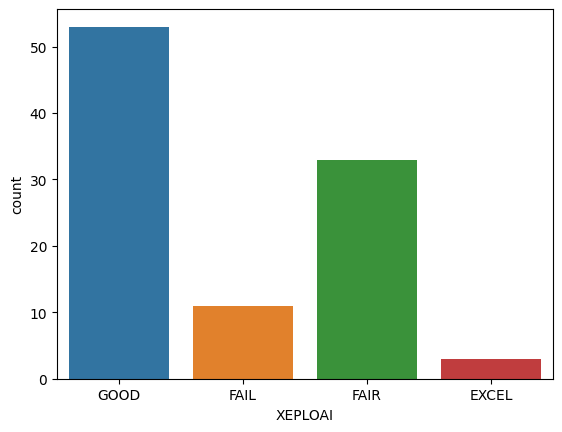

In [19]:
#Hãy trực quan số lượng học sinh theo XEPLOAi,import seaborn  as sns
sns.countplot(x='XEPLOAI', data=df)
plt.show()

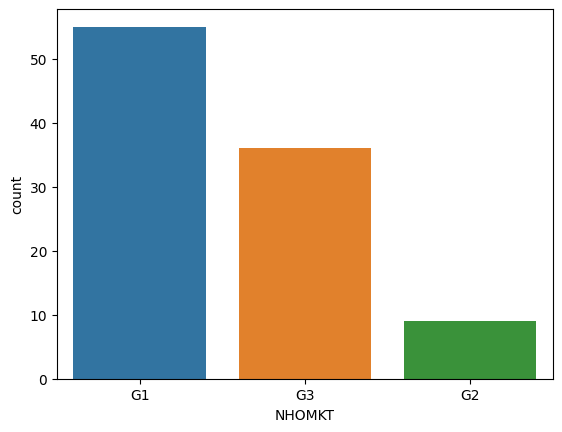

In [20]:
sns.countplot(x='NHOMKT',data=df)
plt.show()

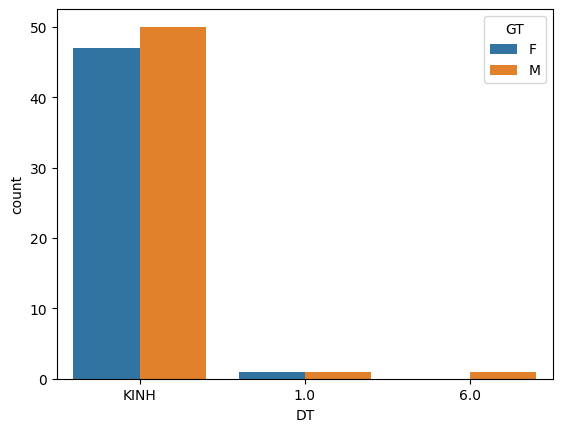

In [21]:
sns.countplot(x='DT',hue='GT',data=df)
plt.show()

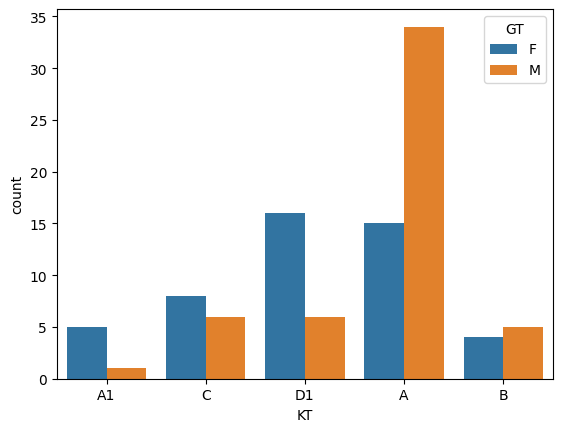

In [22]:
# phân nhóm =hue
# hãy so sánh số lượng hs đăng ký kt dựa theo giới tính
sns.countplot(x='KT',hue='QUANTITYORDERED',data=df)
plt.show()

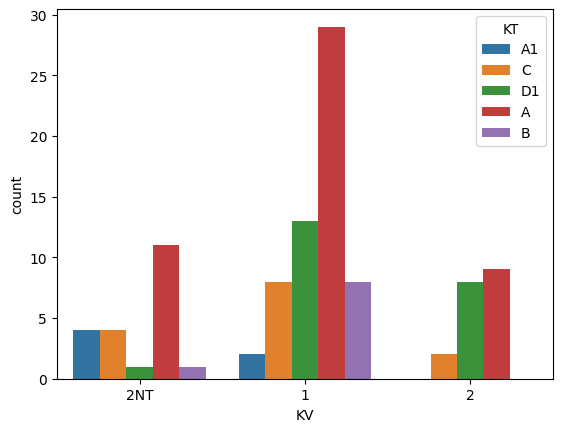

In [23]:
sns.countplot(x='KV', hue='KT', data=df)
plt.show()

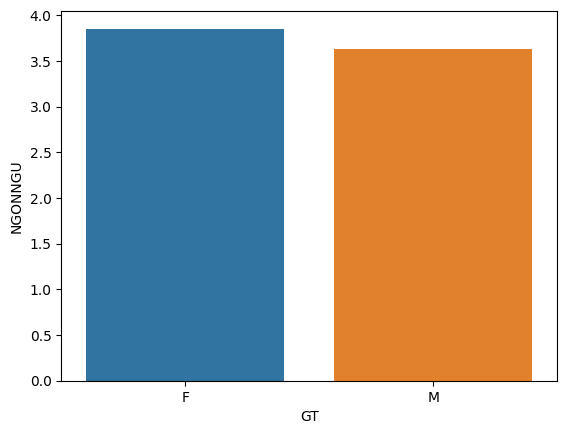

In [24]:
#Hãy so sánh điểm trung bình NGONNGU theo nhóm giới tính
sns.barplot(x='GT',y='NGONNGU', data=df, errorbar = None)
plt.show()

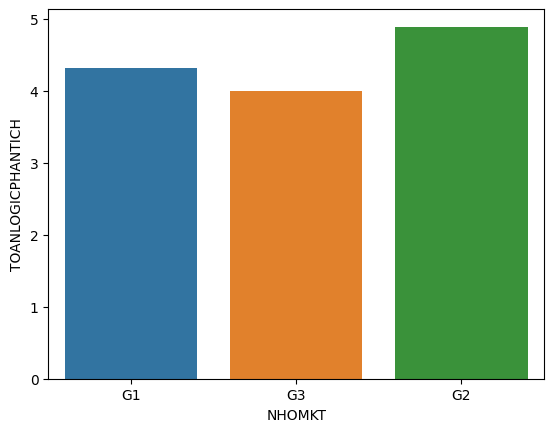

In [25]:
sns.barplot(x='NHOMKT',y='TOANLOGICPHANTICH', data=df, errorbar = None)
plt.show()

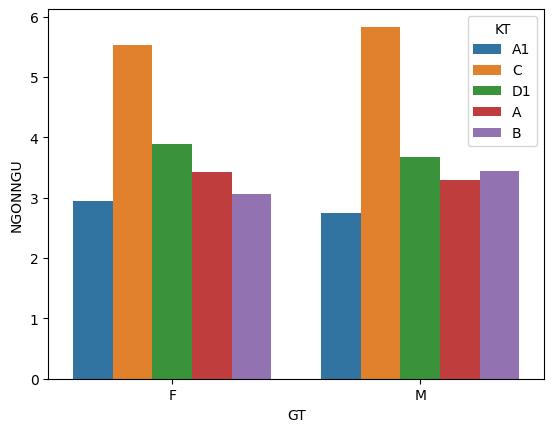

In [26]:
#So sánh điểm trung bình của NGONNGU theo nhóm GT dựa trên KT
sns.barplot(x='GT',y='NGONNGU', hue='KT', data=df, errorbar = None)
plt.show()

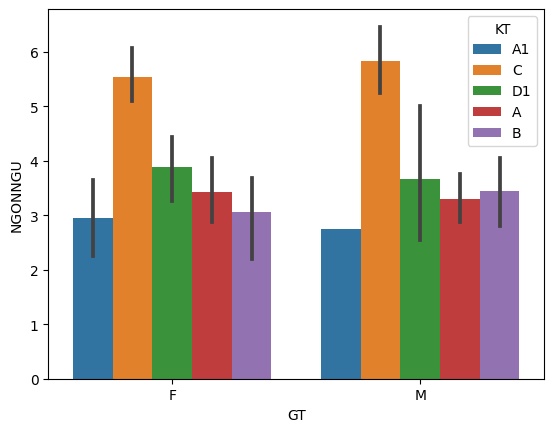

In [27]:
#So sánh điểm trung bình của NGONNGU theo nhóm GT dựa trên KT, cây đen càng dài càng sai lệch, sai số nhiều, độ tin cậy thấp
sns.barplot(x='GT',y='NGONNGU', hue='KT', data=df )
plt.show()

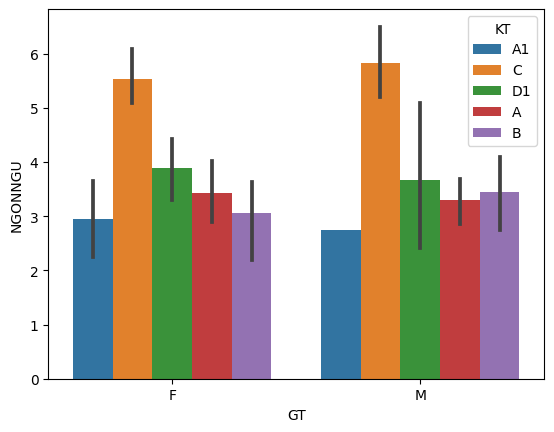

In [28]:
sns.barplot(x='GT',y='NGONNGU', hue='KT', data=df )
plt.show()

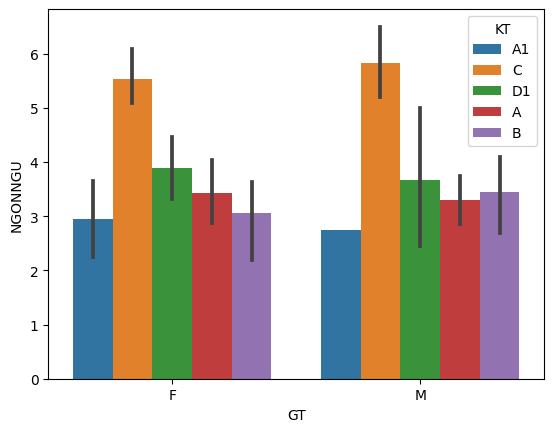

In [29]:
sns.barplot(x='GT',y='NGONNGU', hue='KT', data=df )
plt.show()

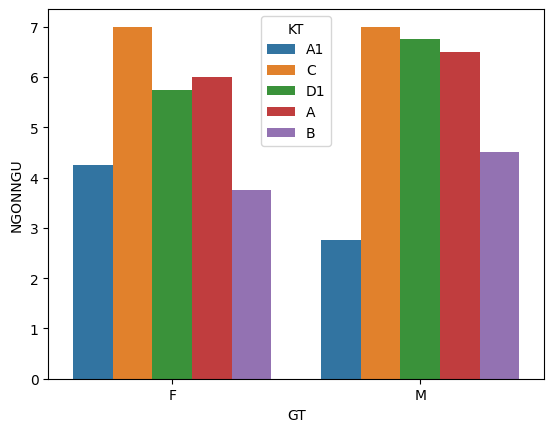

In [30]:
#So sánh điểm cao nhất của NGONNGU theo nhóm GT dựa trên KT
#Lưu ý: không để estimator thì mặc định là mean(trung bình)
sns.barplot(x='GT',y='NGONNGU', hue='KT', data=df, errorbar = None, estimator=max)
plt.show()

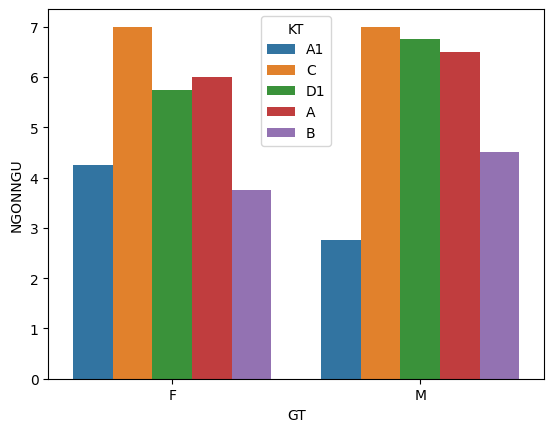

In [31]:
#Khi biến định tính dùng làm nhóm tổng hợp
#có nhiều hơn 2 giá trị hoặc có giá trị thiếu của điểm NGONNGU trên từng nhóm thì ta dùng hàm tổng hợp thông qua thư viện numpy
sns.barplot(x='GT',y='NGONNGU', hue='KT', data=df, errorbar = None, estimator = np.max)
plt.show()

([<matplotlib.patches.Wedge at 0x28993822910>,
 [Text(0.03455180204558485, 1.0994572174374968, 'A'),
  Text(-1.0913261637656648, -0.13786661771624611, 'A1'),
  Text(-0.9097885929166221, -0.618291772708317, 'B'),
  Text(-0.2735587950807367, -1.06544149798756, 'C'),
  Text(0.8475646189152347, -0.7011663260333265, 'D1')],
 [Text(0.018846437479409915, 0.5997039367840891, '49.00%'),
  Text(-0.5952688165994535, -0.0751999732997706, '6.00%'),
  Text(-0.49624832340906655, -0.3372500578409002, '9.00%'),
  Text(-0.14921388822585638, -0.5811499079932144, '14.00%'),
  Text(0.46230797395376433, -0.38245435965454166, '22.00%')])

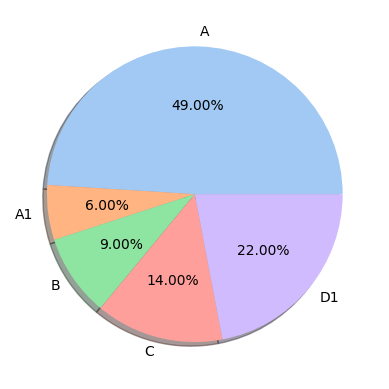

In [32]:
# BIểu đồ pie
# Mục đích: Trực quan dữ liệu theo nhóm tỉ lệ phần trăm
gb = df.groupby(['KT'])['KT'].agg(['count'])
labels=gb.index
data = list(gb['count'])
colors = sns.color_palette('pastel') #Tạo bảng màu
plt.pie(data,labels=labels, colors=colors, autopct='%1.2f%%', shadow= True)

([<matplotlib.patches.Wedge at 0x289a5081410>,
 [Text(-0.33991877217145816, 1.046162142464278, '1'),
  Text(-0.3726115649806359, -1.0349688988770056, '2'),
  Text(0.8691705906232522, -0.6741976597375782, '2NT')],
 [Text(-0.18541023936624987, 0.5706338958896061, '60.00%'),
  Text(-0.20324267180761957, -0.5645284902965484, '19.00%'),
  Text(0.4740930494308647, -0.3677441780386789, '21.00%')])

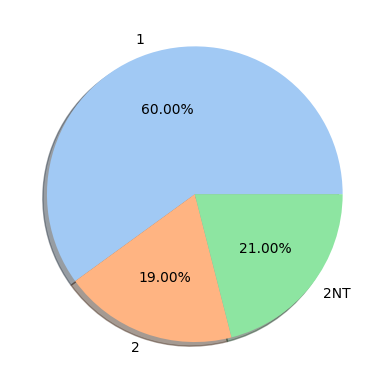

In [33]:
# BIểu đồ pie
# Mục đích: Trực quan dữ liệu theo nhóm tỉ lệ phần trăm
gb = df.groupby(['KV'])['KV'].agg(['count'])
labels=gb.index
data = list(gb['count'])
colors = sns.color_palette('pastel') #Tạo bảng màu
plt.pie(data,labels=labels, colors=colors, autopct='%1.2f%%', shadow= True)

([<matplotlib.patches.Wedge at 0x289a715b450>,
 [Text(-0.36139659458784335, 1.0389381605371468, '1'),
  Text(-0.516974487372832, -0.9709466408642639, '2'),
  Text(0.7472005587938305, -0.8072740085858009, '2NT')],
 [Text(-0.1971254152297327, 0.5666935421111708, '60.7%'),
  Text(-0.2819860840215447, -0.5296072586532348, '13.1%'),
  Text(0.4075639411602711, -0.4403312774104368, '26.2%')])

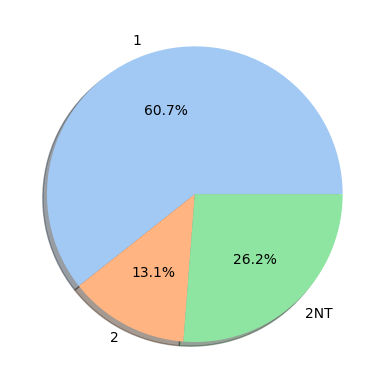

In [34]:
# BIểu đồ pie
# Mục đích: Trực quan dữ liệu theo nhóm tỉ lệ phần trăm diemcong tren tung nhom kv
gb = df.groupby(['KV'])['DIEMCONG'].agg(['sum'])
labels=gb.index
data = list(gb['sum'])
colors = sns.color_palette('pastel') #Tạo bảng màu
plt.pie(data,labels=labels, colors=colors, autopct='%1.1f%%', shadow= True)

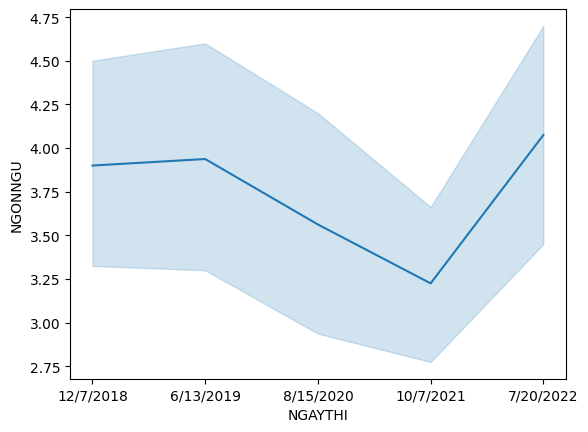

In [35]:
#Biểu dồ line thường dùng để tổng hợp dữ liệu theo trục "thời gian" hoặc "có thứ tự"
#Ví dụ: tổng hợp trung bình điểm ngonngu theo các kỳ thi
sns.lineplot(x='NGAYTHI',y='NGONNGU', data=df)
plt.show()

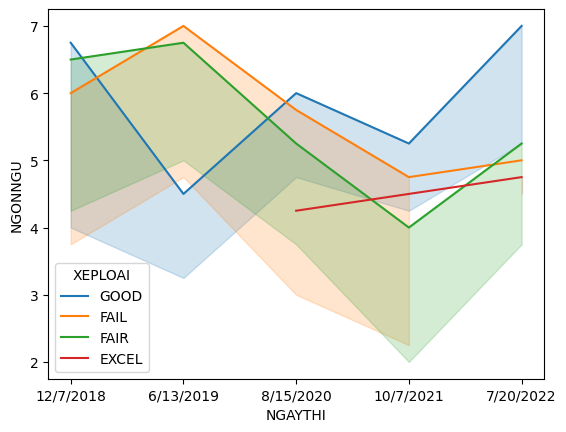

In [36]:
sns.lineplot(x='NGAYTHI',y='NGONNGU',hue='XEPLOAI', data=df, estimator = np.max)
plt.show()

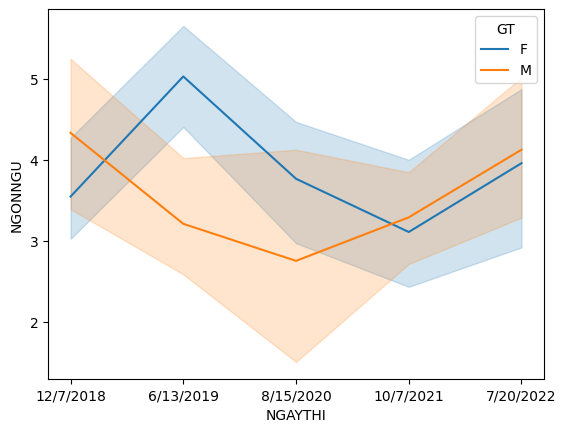

In [37]:
sns.lineplot(x='NGAYTHI',y='NGONNGU',hue='GT', data=df )
plt.show()

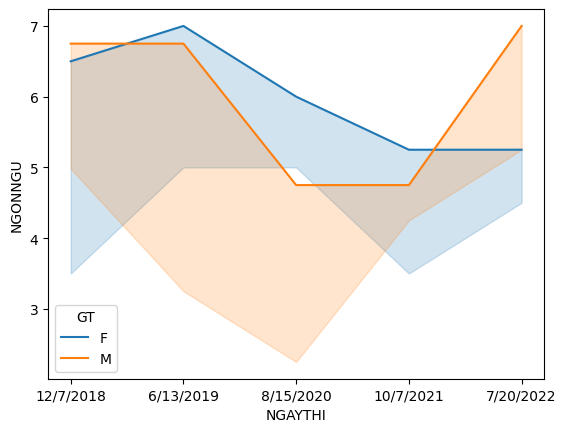

In [38]:
# Tổng hợp điêmt ngonngu lớn nhất theo các năm thi trên từng nhóm giới tính
sns.lineplot(x='NGAYTHI',y='NGONNGU', hue='GT',data=df, estimator = np.max)

plt.show()

In [39]:
df['NGONNGU'].describe()
#Phân tích định lượng lấy trọng tâm là các định lượng 
#Mục đích : Mô tả các tri thức đang ẩn chứa bên trong dữ liệu, thông qua ý nghĩa các đại lượng mô tả toán học.
#Có 2 nhóm đại lượng mô tả:
# Đo lường độ tập trung : min, max , mean, median, mode, p-phân vị
#min max
#mean nhạy cảm (dễ tác động bởi các giá trị bất thường(abnormal)
#Giải thích ý nghĩa các đại lượng (thêm variance)
#Median : trung vị cho biết 50% số pt có giá trị > median
#50% số pt có giả trị < median không bị tác động bởi abnormal values
#mode (yếu vị): cho biết đại đa số phần tử có giá trị là bao nhiêu
#mode không bị tác động bởi abnormal
#p-phân vị: là các đại lượng chia tập các dữ liệu thành p-phần = nhau có số lượng dữ liệu bằng nhau
#Thông thường dùng tứ phân vị

count    100.000000
mean       3.740000
std        1.424408
min        1.000000
25%        2.500000
50%        3.625000
75%        4.750000
max        7.000000
Name: NGONNGU, dtype: float64

In [40]:
print(f'{df["NGONNGU"].min() }\n {df["NGONNGU"].max()}\n')
print(f'{df["NGONNGU"].mean() }\n {df["NGONNGU"].median()}\n')
print(f'{df["NGONNGU"].mode() }\n')
print(f'{df["NGONNGU"].quantile(0.75) }\n')

1.0
 7.0

3.74
 3.625

0    2.0
Name: NGONNGU, dtype: float64

4.75



In [41]:
#ĐO LƯỜNG ĐỌ PHÂN TÁN (biến thiên, biến động, hỗn độn...)
#Biến động càng cao -> độ ổn định càng thấp
#->khó đưa ra quyết định
# Range = max - min range cao thì độ biến động cao
df['NGONNGU'].max()-df['NGONNGU'].min()


6.0

In [42]:
df['NGONNGU'].quantile(0.75)-df['NGONNGU'].quantile(0.25)

2.25

In [43]:
#độ lệch trung bình
np.mean(np.abs(df['NGONNGU']-np.mean(df['NGONNGU'])))

1.1600000000000001

In [44]:
#Hãy tính khoảng range cho T5 và T6
df[['T5','T6']].max()-df[['T5','T6']].min()

T5    6.5
T6    5.8
dtype: float64

In [45]:
df[['T5','T6']].quantile(0.75)-df[['T5','T6']].quantile(0.25)

T5    2.0
T6    2.0
dtype: float64

In [46]:
np.mean(np.abs(df[['T5','T6']]-np.mean(df[['T5','T6']])))

1.14492

In [47]:
df[['T5','T6']].quantile(0.9)

T5    8.51
T6    8.50
Name: 0.9, dtype: float64

In [48]:
#Phương sai càng cao độ biến động càng cao (variance)
df['NGONNGU'].var()

2.0289393939393943

In [49]:
df['NGONNGU'].std()

1.424408436488423

In [50]:
#Phương pháp sử dụng std để so sánh
# mức độ biến động cảu hai hay nhiều biến số
#Ví dụ:Hãy so sánh mức độ ổn định của T5 và T6
df[['T5','T6']].std()
df[['T5','T6']].std()



T5    1.478059
T6    1.363200
dtype: float64

In [51]:
# Phương pháp dùng cofficiant of variance để 
# mức độ biến động của hai hay nhiều biến số
# hãy so sánh mức độ biến động của LOGIC và ngonngu
df[['NGONNGU','TOANLOGICPHANTICH']].std()/df[['NGONNGU','TOANLOGICPHANTICH']].mean()

NGONNGU              0.380858
TOANLOGICPHANTICH    0.249131
dtype: float64

In [52]:
df[['NGONNGU','TOANLOGICPHANTICH','GIAIQUYETVANDE']].describe()


,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE
count,100.000000,100.000000,100.000000
mean,3.740000,4.255000,4.875000
std,1.424408,1.060053,1.041136
min,1.000000,1.500000,2.750000
25%,2.500000,3.500000,4.250000
50%,3.625000,4.125000,4.750000
75%,4.750000,4.750000,5.500000
max,7.000000,8.000000,8.000000


In [53]:
cv=df[['NGONNGU','TOANLOGICPHANTICH','GIAIQUYETVANDE']].std()/df[['NGONNGU','TOANLOGICPHANTICH','GIAIQUYETVANDE']].mean()
df.groupby('GT')['NGONNGU'].describe()

,count,mean,std,min,25%,50%,75%,max
GT,,,,,,,,
F,48.0,3.854167,1.348594,1.25,3.1875,3.75,5.0,7.0
M,52.0,3.634615,1.496288,1.00,2.4375,3.50,4.5,7.0


In [54]:
df.groupby('GT')[['NGONNGU','TOANLOGICPHANTICH','GIAIQUYETVANDE']].describe()

NGONNGU                                                    \
     count      mean       std   min     25%   50%  75%  max   
GT                                                             
F     48.0  3.854167  1.348594  1.25  3.1875  3.75  5.0  7.0   
M     52.0  3.634615  1.496288  1.00  2.4375  3.50  4.5  7.0   

   TOANLOGICPHANTICH            ...            GIAIQUYETVANDE            \
               count      mean  ...  75%   max          count      mean   
GT                              ...                                       
F               48.0  4.046875  ...  4.5  6.75           48.0  4.906250   
M               52.0  4.447115  ...  5.0  8.00           52.0  4.846154   

                                              
         std   min     25%    50%  75%   max  
GT                                            
F   0.946192  3.25  4.2500  4.875  5.5  7.25  
M   1.130194  2.75  4.1875  4.625  5.5  8.00  

[2 rows x 24 columns]

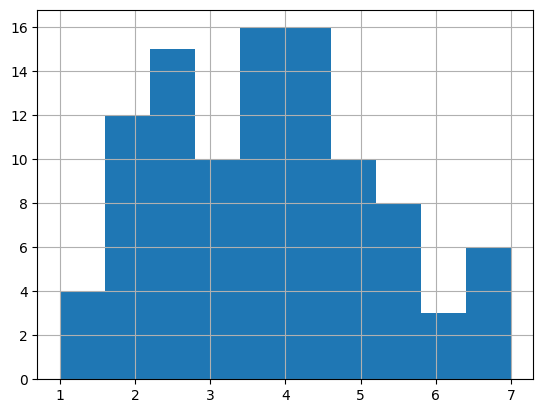

In [55]:
#Histogram là biểu đồ mô tả phân phối xác xuất của biến định lượng
#Mục đích: cho biết xác xuất xảy ra của biến cố trong khoảng giá trị nào nhiều nhất
df['NGONNGU'].hist()
plt.show()

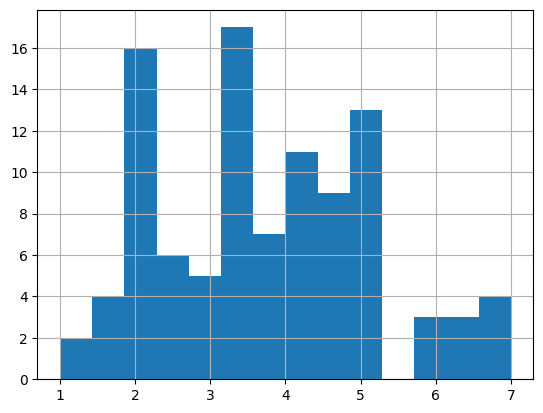

In [56]:
df['NGONNGU'].hist(bins=14)
plt.show()

c:\Users\teoqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


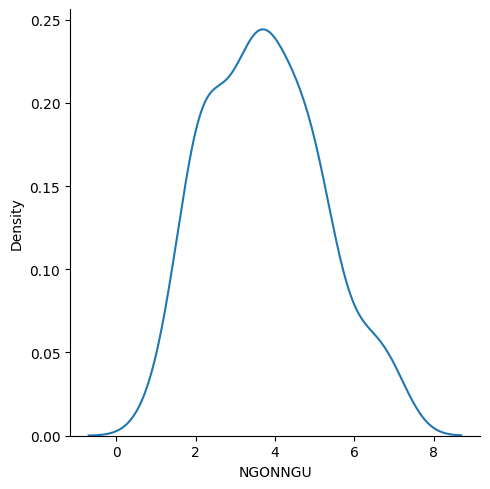

In [57]:
sns.displot(df,x='NGONNGU',kind='kde')
plt.show()

c:\Users\teoqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


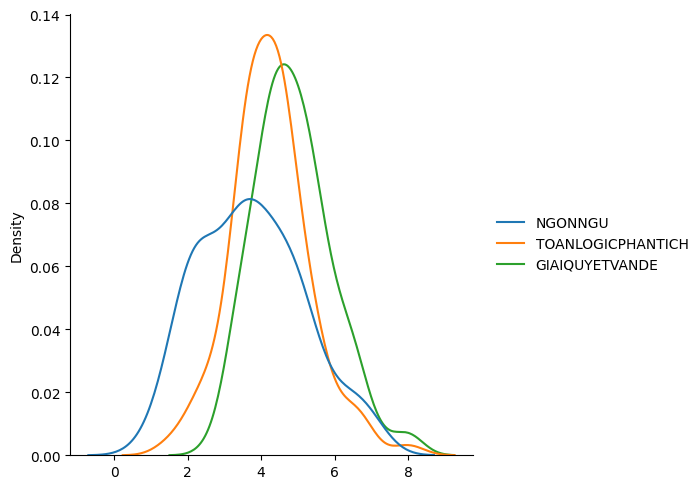

In [58]:
sns.displot(data=df[['NGONNGU','TOANLOGICPHANTICH','GIAIQUYETVANDE']],kind='kde')
plt.show()

c:\Users\teoqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


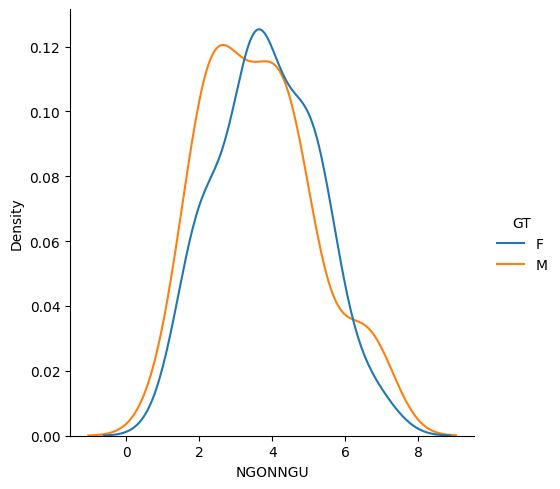

In [59]:
sns.displot(df,x='NGONNGU',hue='GT',kind='kde')
plt.show()

In [60]:
#skewness là độ xiên, độ lớn (trị tuyệt đối) cho biết mức độ dữ liệu lệch nhiều hay ít so với dường cong phân phối chuẩn.
#Cho biết xác xuất được phân bố, lệch về phía nào nhiều
#Trị tuyết đối giá trị càng lớn thì dữ liệu phân phối nghiêng càng nhiều(lệch)
#Diễn giải cho skewness
#Skewness > 0 tức là mean > median : ta gọi là Positive Skewness hay lệch phải , tức là giá trị ngoại biên outliers nhận giá trị lớn sẽ đẩy giá trị trung bình về cuối
#Skewness=0 thì mean=medium
df['NGONNGU'].skew()

0.33322084231625376

In [62]:
df[['NGONNGU','TOANLOGICPHANTICH','GIAIQUYETVANDE']].skew()
#Note: Khi phân tich dữ liệu với các phương pháp có liên quan
#nếu dữ liệu quá lệch so với phân phối chuẩn thì
# ta cần tìm chính bằng các hàm transform cho bớt lệch
# Đặc biệt là phân tích hồi quy

NGONNGU              0.333221
TOANLOGICPHANTICH    0.472551
GIAIQUYETVANDE       0.607063
dtype: float64

In [64]:
#Kurtosis (Pearson kurtosis): Độ nhon, trị tuyệt đối cho biết mức độ 
#Giá trị của kurtosis
#Càng gần 3 thì fit
#Dưới 3 thì fat
# Trên 3 thì thin 
#Thông thường để đánh giá hình dạng độ nhon ta dùng đại lượng excess kurtosis (còn gọi là Fisher Kurtosis)=Kurtosis-3
#+ Nếu excess >0 thì thin
# + Nếu excess =0 thì fit
#+ Nếu excess <0 thì fat
df['NGONNGU'].kurtosis()

-0.517003797550498

In [66]:
df[['NGONNGU','TOANLOGICPHANTICH','GIAIQUYETVANDE']].kurtosis()

NGONNGU             -0.517004
TOANLOGICPHANTICH    1.372439
GIAIQUYETVANDE       0.442173
dtype: float64

c:\Users\teoqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


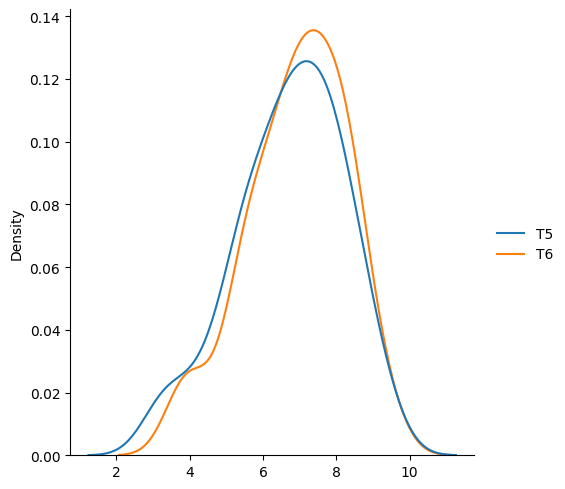

T5   -0.189668
T6   -0.228734
dtype: float64

In [72]:
sns.displot(data=df[['T5','T6']],kind='kde')
plt.show()
df[['T5','T6']].kurtosis()

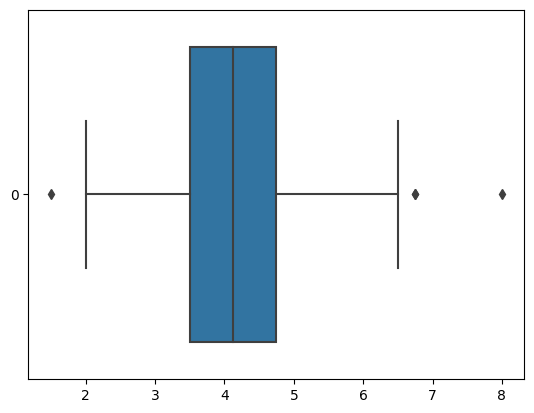

In [73]:
# đây là biểu đồ quan trọng trong việc phân tích dữ liệu định lượng 
# Biểu đồ nay cung cấp các thông tin quan trong như
#1. Q1:Từ phân vị 25%
#2. Q2: Từ phân vị 50%(median)
#3. Q3: Từ phân vị 75%
#4. Độ lớn của IQR=|Q3-Q1|
#5. Lower bound =Q1 - 1.5*IQR
#6. Upper bound = Q3 + 1.5IQR
#7. Các ngoại biên, bất thường (outlier) cần xử lý trong dữ liệu 
#Outlier: là điểm dữ liệu khác biết quá nhiều so với đa số
#Hướng dẫn 
#+Tính khoảng nghi ngờ chứa outliers
sns.boxplot(data=df['TOANLOGICPHANTICH'],orient='h')
plt.show()

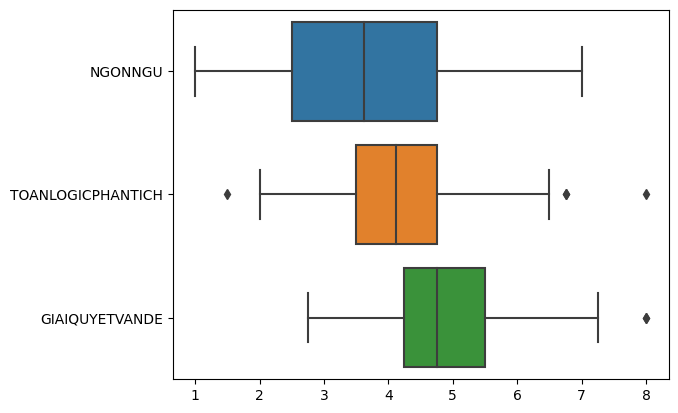

In [74]:
sns.boxplot(data=df[['NGONNGU','TOANLOGICPHANTICH','GIAIQUYETVANDE']],orient='h')
plt.show()

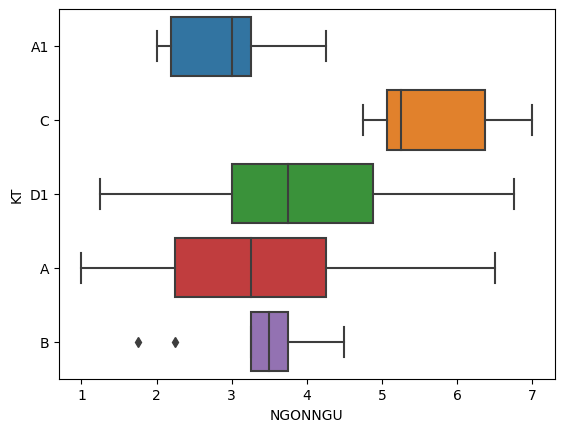

In [76]:
sns.boxplot(x='NGONNGU',y='KT',data=df,orient='h')
plt.show()

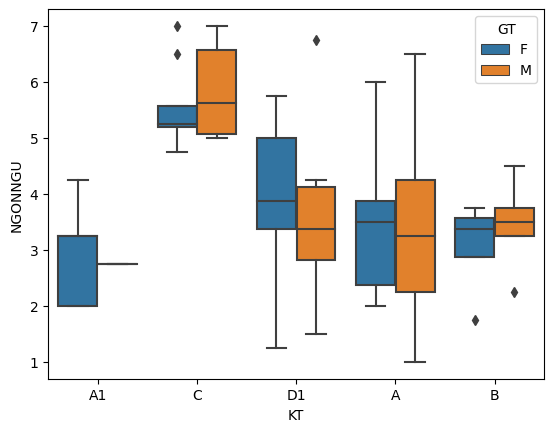

In [78]:
sns.boxplot(x='KT',y='NGONNGU',hue='GT',data=df)
plt.show()

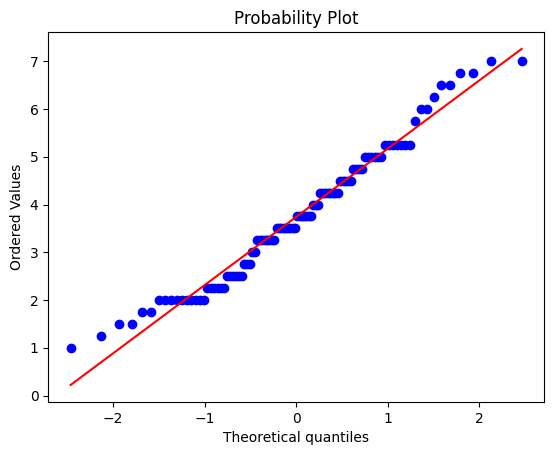

In [83]:
#Kiểm đinh phân phối chuẩn
stats.probplot(df['NGONNGU'],plot=sns.mpl.pyplot)
plt.show()

In [84]:
#Phân tích sự tác động (ảnh hưởng) qua lại giữa 2 biến định lượng
#phương pháp 1: Hiệp phương sai: co-variance
#Giá trị của co-variance >0 thì 2 biến có tương quan thuận(đồng biến)
#Giá trị của co-variance <0 thì 2 biến có tương quan nghịch(nghịch biến)
#Giá trị của co-variance =0 thì 2 biến có không tương quan
# Độ lớn (trị tuyệt đối của giá trị) càng lớn thì mức độ quan hệ(tương quan) chặt chẽ

# Ma trân hiệp phương sai: co-variance matrix
df[['T5','T6']].cov()

,T5,T6
T5,2.184658,1.568961
T6,1.568961,1.858314


In [85]:
#Với phương pháp so sánh tương quan bằng co-variance
# thì ta không đo lường được 
#Pearson Corelation: Tương quan tuyến tính
# r nằm trong khoảng [-1,1]
# r=0 => không tương quan
# r<0: tương quan nghịch
# r>0: tương quan thuận
#|r| càng gần 1 thì tương quan càng cao
#|r| <0.5 thì tương quan thấp
#|0.5,0.65| khá
#|0.̉̉,5,0.75| tốt00
#|0.75,0.9| rát tốt
#>0.9 hoàn hảo
# Ma trận tương quan:correlation matrix
#*Lưu ý được sử dụng khảo sát tương quan tuyến tính nhằm phân tích mối quan hệ tuyến tính giữa 2 biến định lượng
df[['T5','T6']].corr()

,T5,T6
T5,1.000000,0.778683
T6,0.778683,1.000000


c:\Users\teoqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


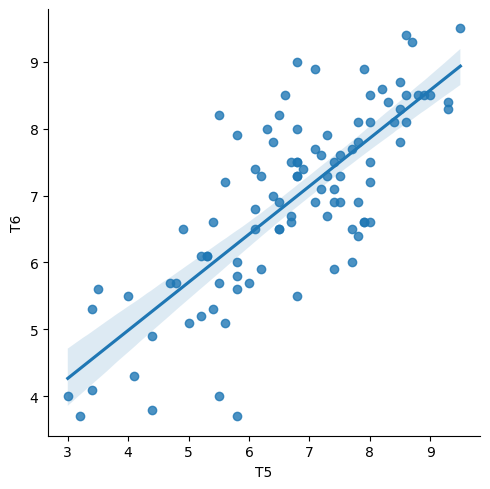

In [89]:
sns.lmplot(data=df,x='T5',y='T6',fit_reg=True)
plt.show()

c:\Users\teoqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


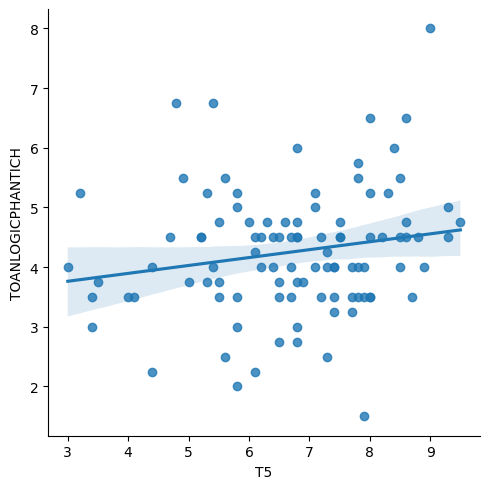

In [90]:
sns.lmplot(data=df,x='T6',y='TOANLOGICPHANTICH',fit_reg=True)
plt.show()

c:\Users\teoqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


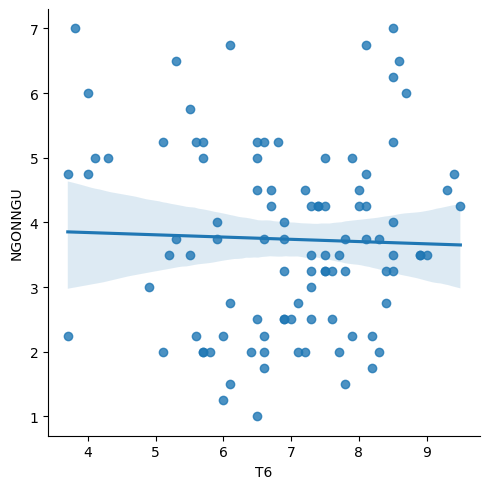

In [91]:
sns.lmplot(data=df,x='T6',y='NGONNGU',fit_reg=True)
plt.show()

c:\Users\teoqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


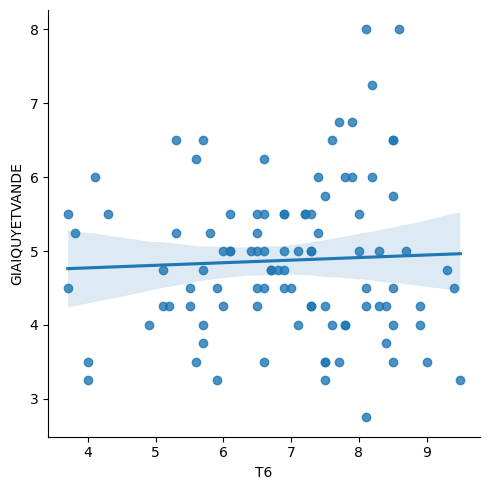

,T6,TOANLOGICPHANTICH,NGONNGU,GIAIQUYETVANDE
T6,1.000000,0.301490,-0.033360,0.045638
TOANLOGICPHANTICH,0.301490,1.000000,0.035154,-0.091523
NGONNGU,-0.033360,0.035154,1.000000,0.018731
GIAIQUYETVANDE,0.045638,-0.091523,0.018731,1.000000


In [93]:
sns.lmplot(data=df,x='T6',y='GIAIQUYETVANDE',fit_reg=True)
plt.show()
df[['T6','TOANLOGICPHANTICH','NGONNGU','GIAIQUYETVANDE']].corr()